### Business Problem(İş Problemi):

- Bu proje için problem tanımı ,yani çözüm bulmaya çalıştığımız konu da diyebiliriz, insan gücü kaynağını daha verimli kullanabilir miyiz sorusunun cevabını vermek.

- El yazısıyla yazılmış olan rakamların görüntüleri çekilmiş ve bunlardan veri seti oluşturulmuş.

- Projede kullanılacak veri setinin adı "MNIST"dir.(Modified National Institute of Standards and Technology)

- Piksel, insan gözünün bir görüntüde(image) ayırt edebileceği en küçük birimdir. Veri setindeki görüntüler 28*28'lik  piksellerden oluşmaktadır.

- Veri setinde 60.000 tanesi eğitim veri seti(train dataset), 10.000 tanesi de test veri seti olmak üzere toplamda 70.000 görüntü(image) ya da fotoğraf bulunmaktadır.

### Data Understanding(Veriyi Anlamak):

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #kullanacağımız veri seti tensorflow kütüphanesi içinde vardır zaten
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [2]:
# MNIST adlı veri seti zaten tensorflow kütüphanesi içinde vardır bu nedenle veri setini direkt tensorflow'dan yüklüyoruz 

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print("Eğitim Seti Boyutu:", x_train.shape, y_train.shape)

Eğitim Seti Boyutu: (60000, 28, 28) (60000,)


In [4]:
print("Test Seti Boyutu:", x_test.shape, y_test.shape)

Test Seti Boyutu: (10000, 28, 28) (10000,)


In [5]:
# sınıf sayısı
num_labels = len(np.unique(y_train))

In [6]:
num_labels

10

- burda x_train pikselleri temsil eder, y_train ise çıktıyı temsil eder label da diyebiliriz.
- Veri setinde 10 tane sınıf var(0'dan dokuza kadar tüm rakamlar var) y değerleri aslında bu sınıfları temsil eder. Bu sayıların karşılığında 28*28'lik piksellerden oluşan bir görsel var x değerleri de bu görüntüleri temsil eder.

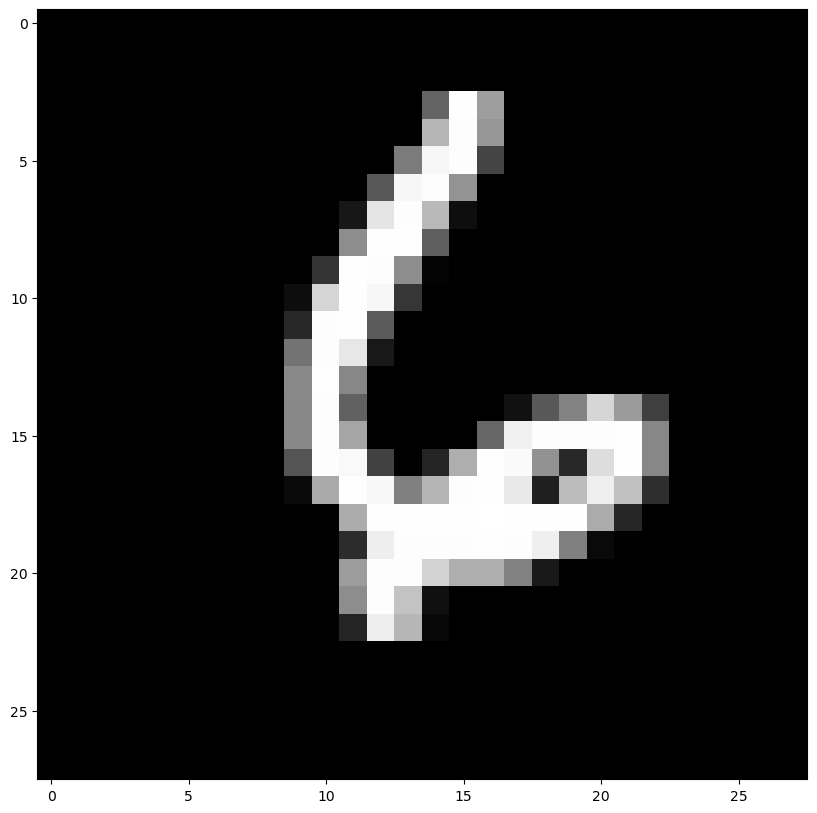

In [7]:
# Veri setinden örnekler gösterilmesi

plt.figure(figsize=(10,10))
plt.imshow(x_train[59000], cmap='gray') # 'x_train setindeki 59000'inci görseli göster' der

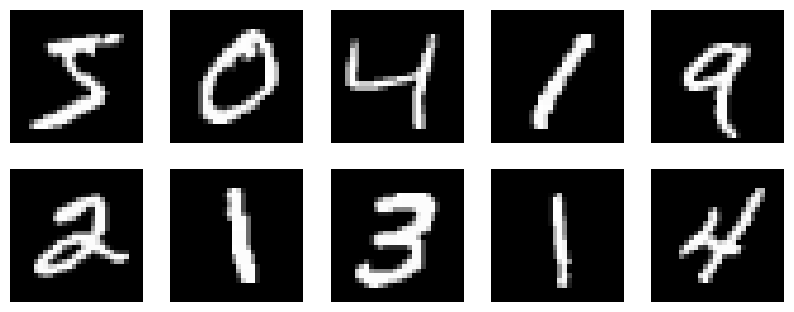

In [8]:
plt.figure(figsize=(10,10))
for n in range(10):
    ax = plt.subplot(5,5,n+1) # genel şablonda 5 satır olsun 5 de sütun olsun alt alta yazdıralım
    plt.imshow(x_train[n], cmap='gray') #ilk 10 resmi bastırır
    plt.axis('off') # eksen bilgisi istemediğimizi belirtir

In [9]:
# yukarıdaki işlem daha sonra da işimize yarayabilir bu sebeple bunu bir fonksiyon olarak tanımlayalım ve hazır dursun

def visualize_img(data):
    plt.figure(figsize=(10,10))
    for n in range(10):
        ax = plt.subplot(5,5,n+1) 
        plt.imshow(data[n], cmap='gray')  
        plt.axis('off')

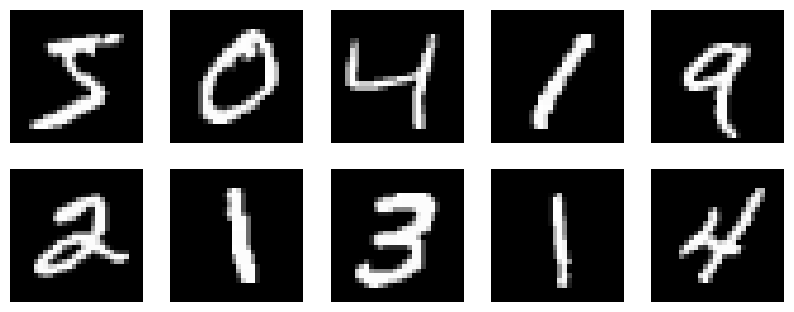

In [10]:
visualize_img(x_train)

- Bilgisayarlar bir renk oluşturmak istediklerinde temel olarak üç rengi kullanırlar:
- RGB(Red-Green-Blue) yani kırmızı-yeşil-mavi, diğer tüm renkler bu üç temel renk üzerinden oluşturulurlar.
- RGB değerleri 0-255 arasında değerler alırlar.
- Mesela R:250 G:10 B:240 değerleri karışımı "mor" renge karşılık gelir.
- R:255 G:255 B:255 olması "Beyaz" renge karşılık gelir. Parlaklığın en yüksek olduğu durum.
- R:0 G:0 B:0 olması "Siyah" renge karşılık gelir. Parlaklığın en az old. hiçe yakın old. durum.

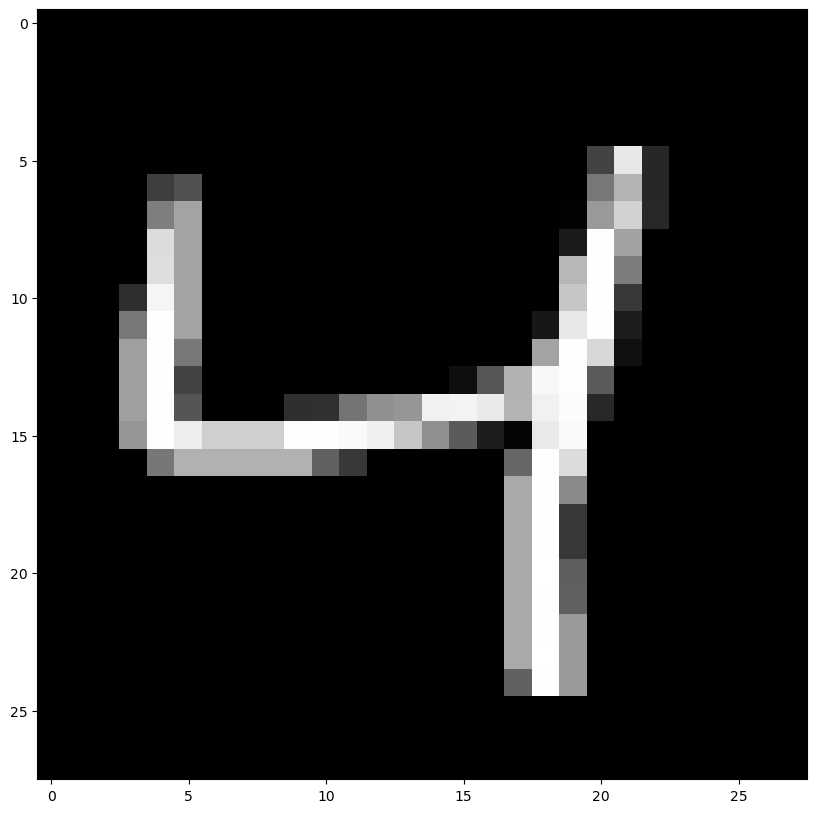

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[2], cmap='gray')

In [12]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [13]:
x_train[2].shape

(28, 28)

In [14]:
# x_train setindeki 2.görselin 10.satır ve 10.sütununa karşılık gelen pikselin değerini verir
# pikselin brightness value'su da diyebiliriz(parlaklık değeri)
x_train[2][10,10]

0

In [15]:
x_train[2][14,10]

49

In [16]:
x_train[2].mean()

24.799744897959183

In [17]:
# görseldeki belli bir bölgeye zoom yapmak gibi düşünebiliriz
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [18]:
x_train[2][14:20,10:20].mean()

96.51666666666667

In [19]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width, height = img.shape

    threshold = img.max() / 2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                       color='white' if img[x][y]<threshold else 'black')

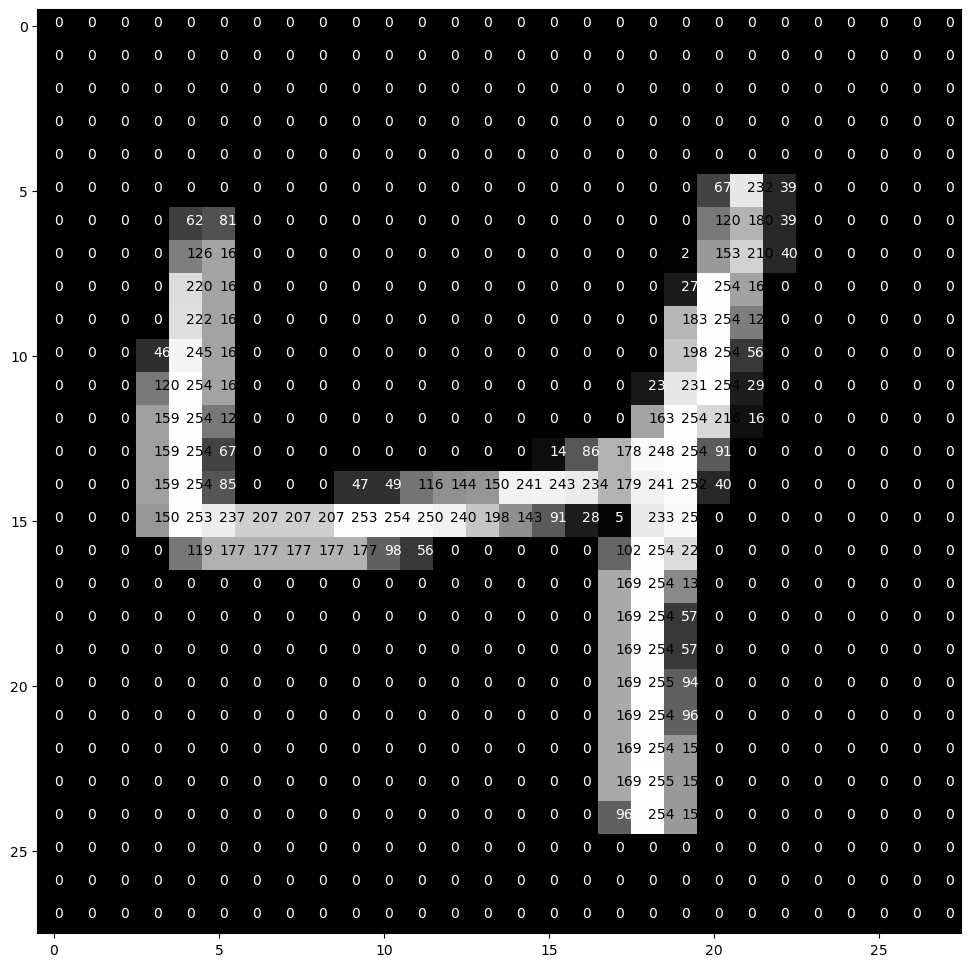

In [20]:
pixel_visualize(x_train[2])

### Data Preparation(Veriyi Hazırlama):

#### 1. Encoding

In [21]:
# Buradaki ilk adım "Encoding" işlemini uygulamak olacaktır.
# Encoding işlemi bağımlı değişkene yani output'a uygulanır.
# Encode etmek demek binary olarak yani 0-1 sisteminde ifade etmek demektir.

# y_train verileri görüntülerde hangi sayılar olduğunu ifade eder yani label'dır.
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
# encode işlemini hem y_train hem de y_test setine uygulamalıyız.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 2. Reshaping

In [24]:
image_size = x_train.shape[1]

In [25]:
image_size

28

In [26]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [27]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


#### 3. Normalization(Standartlaştırma)

In [28]:
# input değerlerinin yani görsellerdeki piksel değerlerinin 0 ila 1 arasında değer almaları sağlanıyor.

x_train = x_train.astype('float32') / 255 

x_test = x_test.astype('float32') / 255

### Modelling(Modelleme):

In [29]:
# Sinir Ağı Mimarisini Tanımlayalım, burda aslında modelin yapısını tanımlıyoruz model kurmuyoruz

# "Sequential"sıralı demektir, sıralı katmanlardan oluşan bir yapay sinir ağı oluşturmamızı sağlar
# "Flatten" katmanı ile veri seti sinir ağının anlayabileceği forma yani tek boyutlu matris haline getirilir, input burda şekillenir
# Dense ile tanımlanan ilk katman hidden layer'dır, 128 birimden yani nörondan oluşuyor, aktivasyon fonksiyonu olarak relu kullanılmış
# gizli katmanlarda genellikle relu kullanılır 
# Dense ile tanımlanan ikinci katman ise çıktı katmanıdır, aktivasyon fonksiyonu olarak softmax kullanılmış çünkü bu çok sınıflı bir
# sınıflandırma problemidir, çıkış katmanında 10 tane nöron vardır "num_labels" onu temsil eder bunun nedeni ise 10 sınıf olmasıdır
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units=num_labels, activation='softmax', name='output_layer')])


# modelin iç inşası diyebiliriz bu bölüme, matematiksel özellikler belirleniyor
# 'loss' hata değerlendirme metriğidir, çok sısnıflı bir sınıflandırma problemi old. için "categorical_crossentropy" yöntemi kullanılır
# loss fonksiyonunu minimize edecek optimizasyon yöntemi "adam" algoritmasıdır.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8325 - loss: 0.6132 - precision: 0.9269 - recall: 0.7077 - val_accuracy: 0.9402 - val_loss: 0.2019 - val_precision: 0.9556 - val_recall: 0.9276
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1847 - precision: 0.9604 - recall: 0.9368 - val_accuracy: 0.9583 - val_loss: 0.1416 - val_precision: 0.9683 - val_recall: 0.9493
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1271 - precision: 0.9715 - recall: 0.9562 - val_accuracy: 0.9662 - val_loss: 0.1127 - val_precision: 0.9735 - val_recall: 0.9600
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0964 - precision: 0.9790 - recall: 0.9687 - val_accuracy: 0.9688 - val_loss: 0.1012 - val_precision: 0.9743 - val_recall: 0.9643
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9781 - loss: 0.0766 - precision: 0.9819 - recall: 0.9744 - val_accuracy: 0.9733 - val_loss: 0.0902 

### Evaluation(Model Başarısını Değerlendirme)

In [32]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test,y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.0633 - precision: 0.9852 - recall: 0.9793 - val_accuracy: 0.9738 - val_loss: 0.0854 - val_precision: 0.9772 - val_recall: 0.9708
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0539 - precision: 0.9875 - recall: 0.9829 - val_accuracy: 0.9764 - val_loss: 0.0801 - val_precision: 0.9805 - val_recall: 0.9741
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0439 - precision: 0.9896 - recall: 0.9855 - val_accuracy: 0.9761 - val_loss: 0.0778 - val_precision: 0.9797 - val_recall: 0.9738
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9893 - loss: 0.0385 - precision: 0.9914 - recall: 0.9869 - val_accuracy: 0.9775 - val_loss: 0.0757 - val_precision: 0.9808 - val_recall: 0.9753
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0314 - precision: 0.9934 - recall: 0.9906 - val_accuracy: 0.9788 - val_loss: 0.0719 

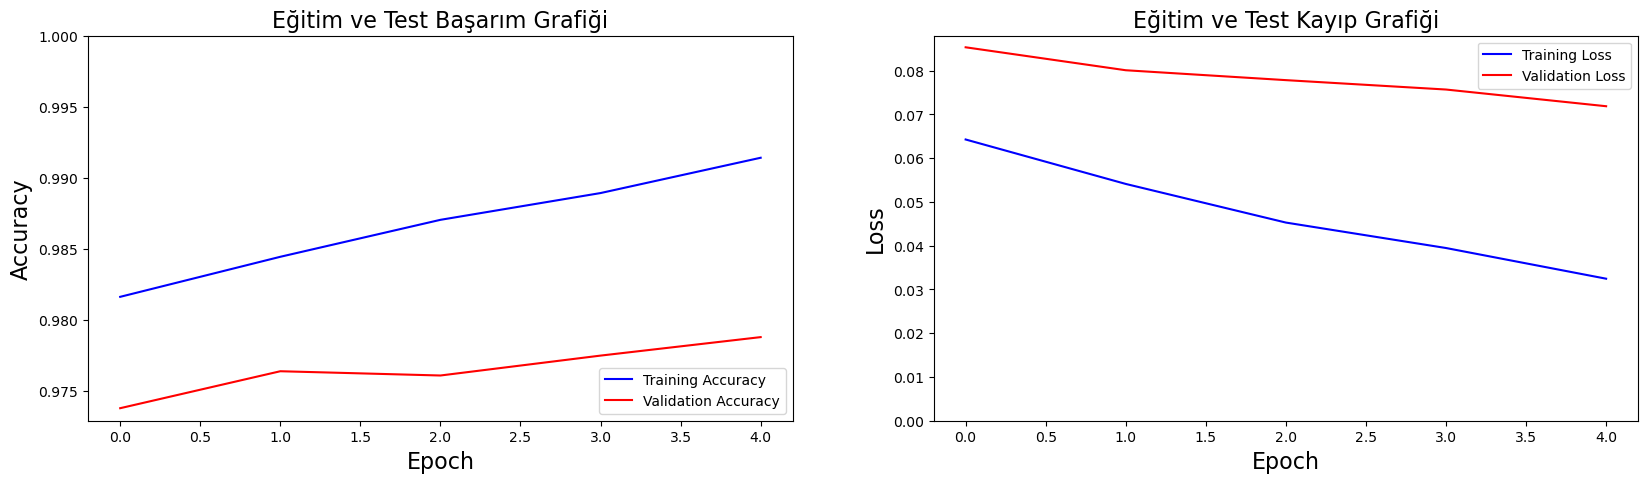

In [33]:
###############################
# Accuracy ve Loss Grafikleri
##############################

#--------------------------------- Grafik 1 Accuracy -------------------------------------

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right') # lejantın nerede olacağı bilgisi
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)

#--------------------------------- Grafik 2 Loss -----------------------------------------

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right') # lejantın nerede olacağı bilgisi
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title('Eğitim ve Test Kayıp Grafiği', fontsize=16)
plt.show()

In [34]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision)) # tahmin ettiklerimizin başarısı
print("\nTest Recall: %.1f%%" % (100.0 * recall))

# accuracy,precision ve recall değerlerinin birbirine yakın çıkması sınıf dağılımlarında dengesizlik olmadığı anlamına gelir.


Test Accuracy: 97.9%

Test Loss: 7.2%

Test Precision: 98.1%

Test Recall: 97.6%


### Modelin Kaydedilmesi ve Tahmin İçin Kullanılması:

In [36]:
model.save('mnist_model.keras')

In [37]:
import random 

random = random.randint(0, x_test.shape[0])

In [38]:
random

8353

In [39]:
test_image = x_test[random]

In [40]:
y_test[random]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

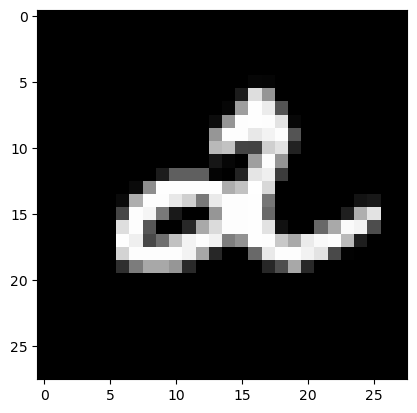

In [41]:
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [42]:
test_data = x_test[random].reshape(1,28,28,1)

In [43]:
probability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [44]:
predicted_classes = np.argmax(probability)

In [45]:
predicted_classes

2

In [46]:
print(f"Tahmin Edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis= -1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri: \n{probability}")

Tahmin Edilen Sınıf: 2 

Tahmin Edilen Sınıfın Olasılık Değeri: 0.9979472756385803 

Diğer Sınıfların Olasılık Değerleri: 
[[2.6641009e-09 3.9057065e-07 9.9794728e-01 1.5377533e-05 2.0363112e-03
  1.7440155e-07 3.0899392e-09 3.9779721e-07 2.3940098e-08 6.7111316e-08]]
